# Crab Age Prediction 

### Importing Necessary Libraries

In [21]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [22]:
crab_data =pd.read_csv('CrabAgePrediction.csv')
crab_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [23]:
crab_data.isnull().sum() 

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

## Data Analysis, Data Visualization

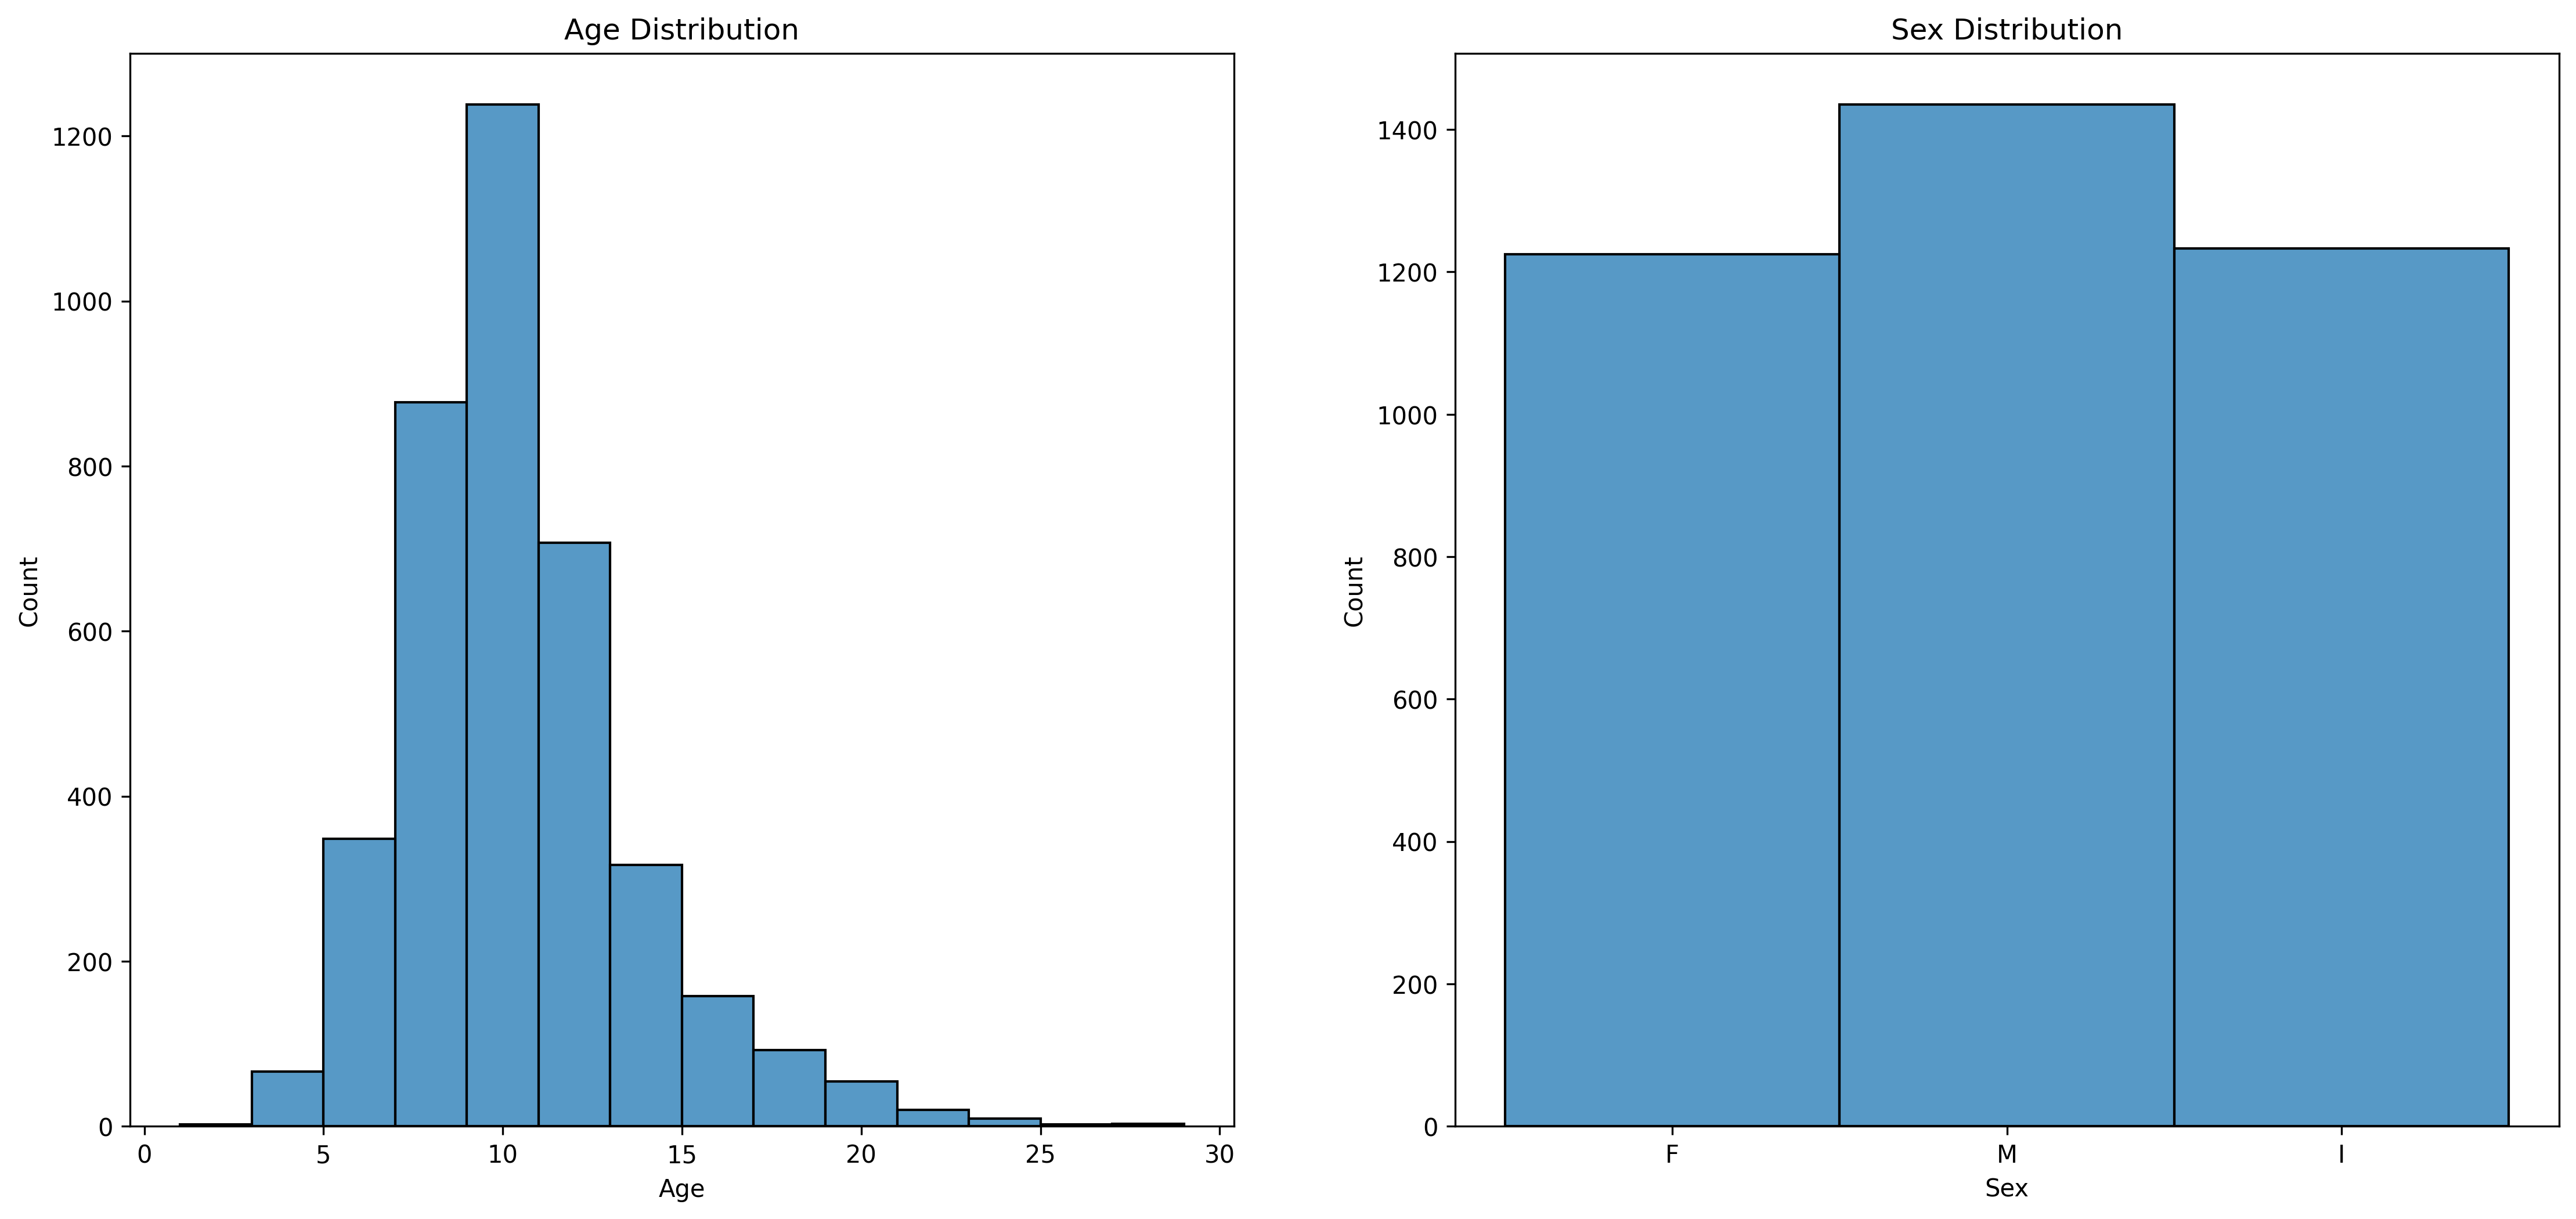

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8),dpi=300)

sns.histplot(data=crab_data,x='Age',ax=axes[0],binwidth=2.0).set_title('Age Distribution')
sns.histplot(data=crab_data,x='Sex',ax=axes[1],fill = True).set_title('Sex Distribution')

plt.show()

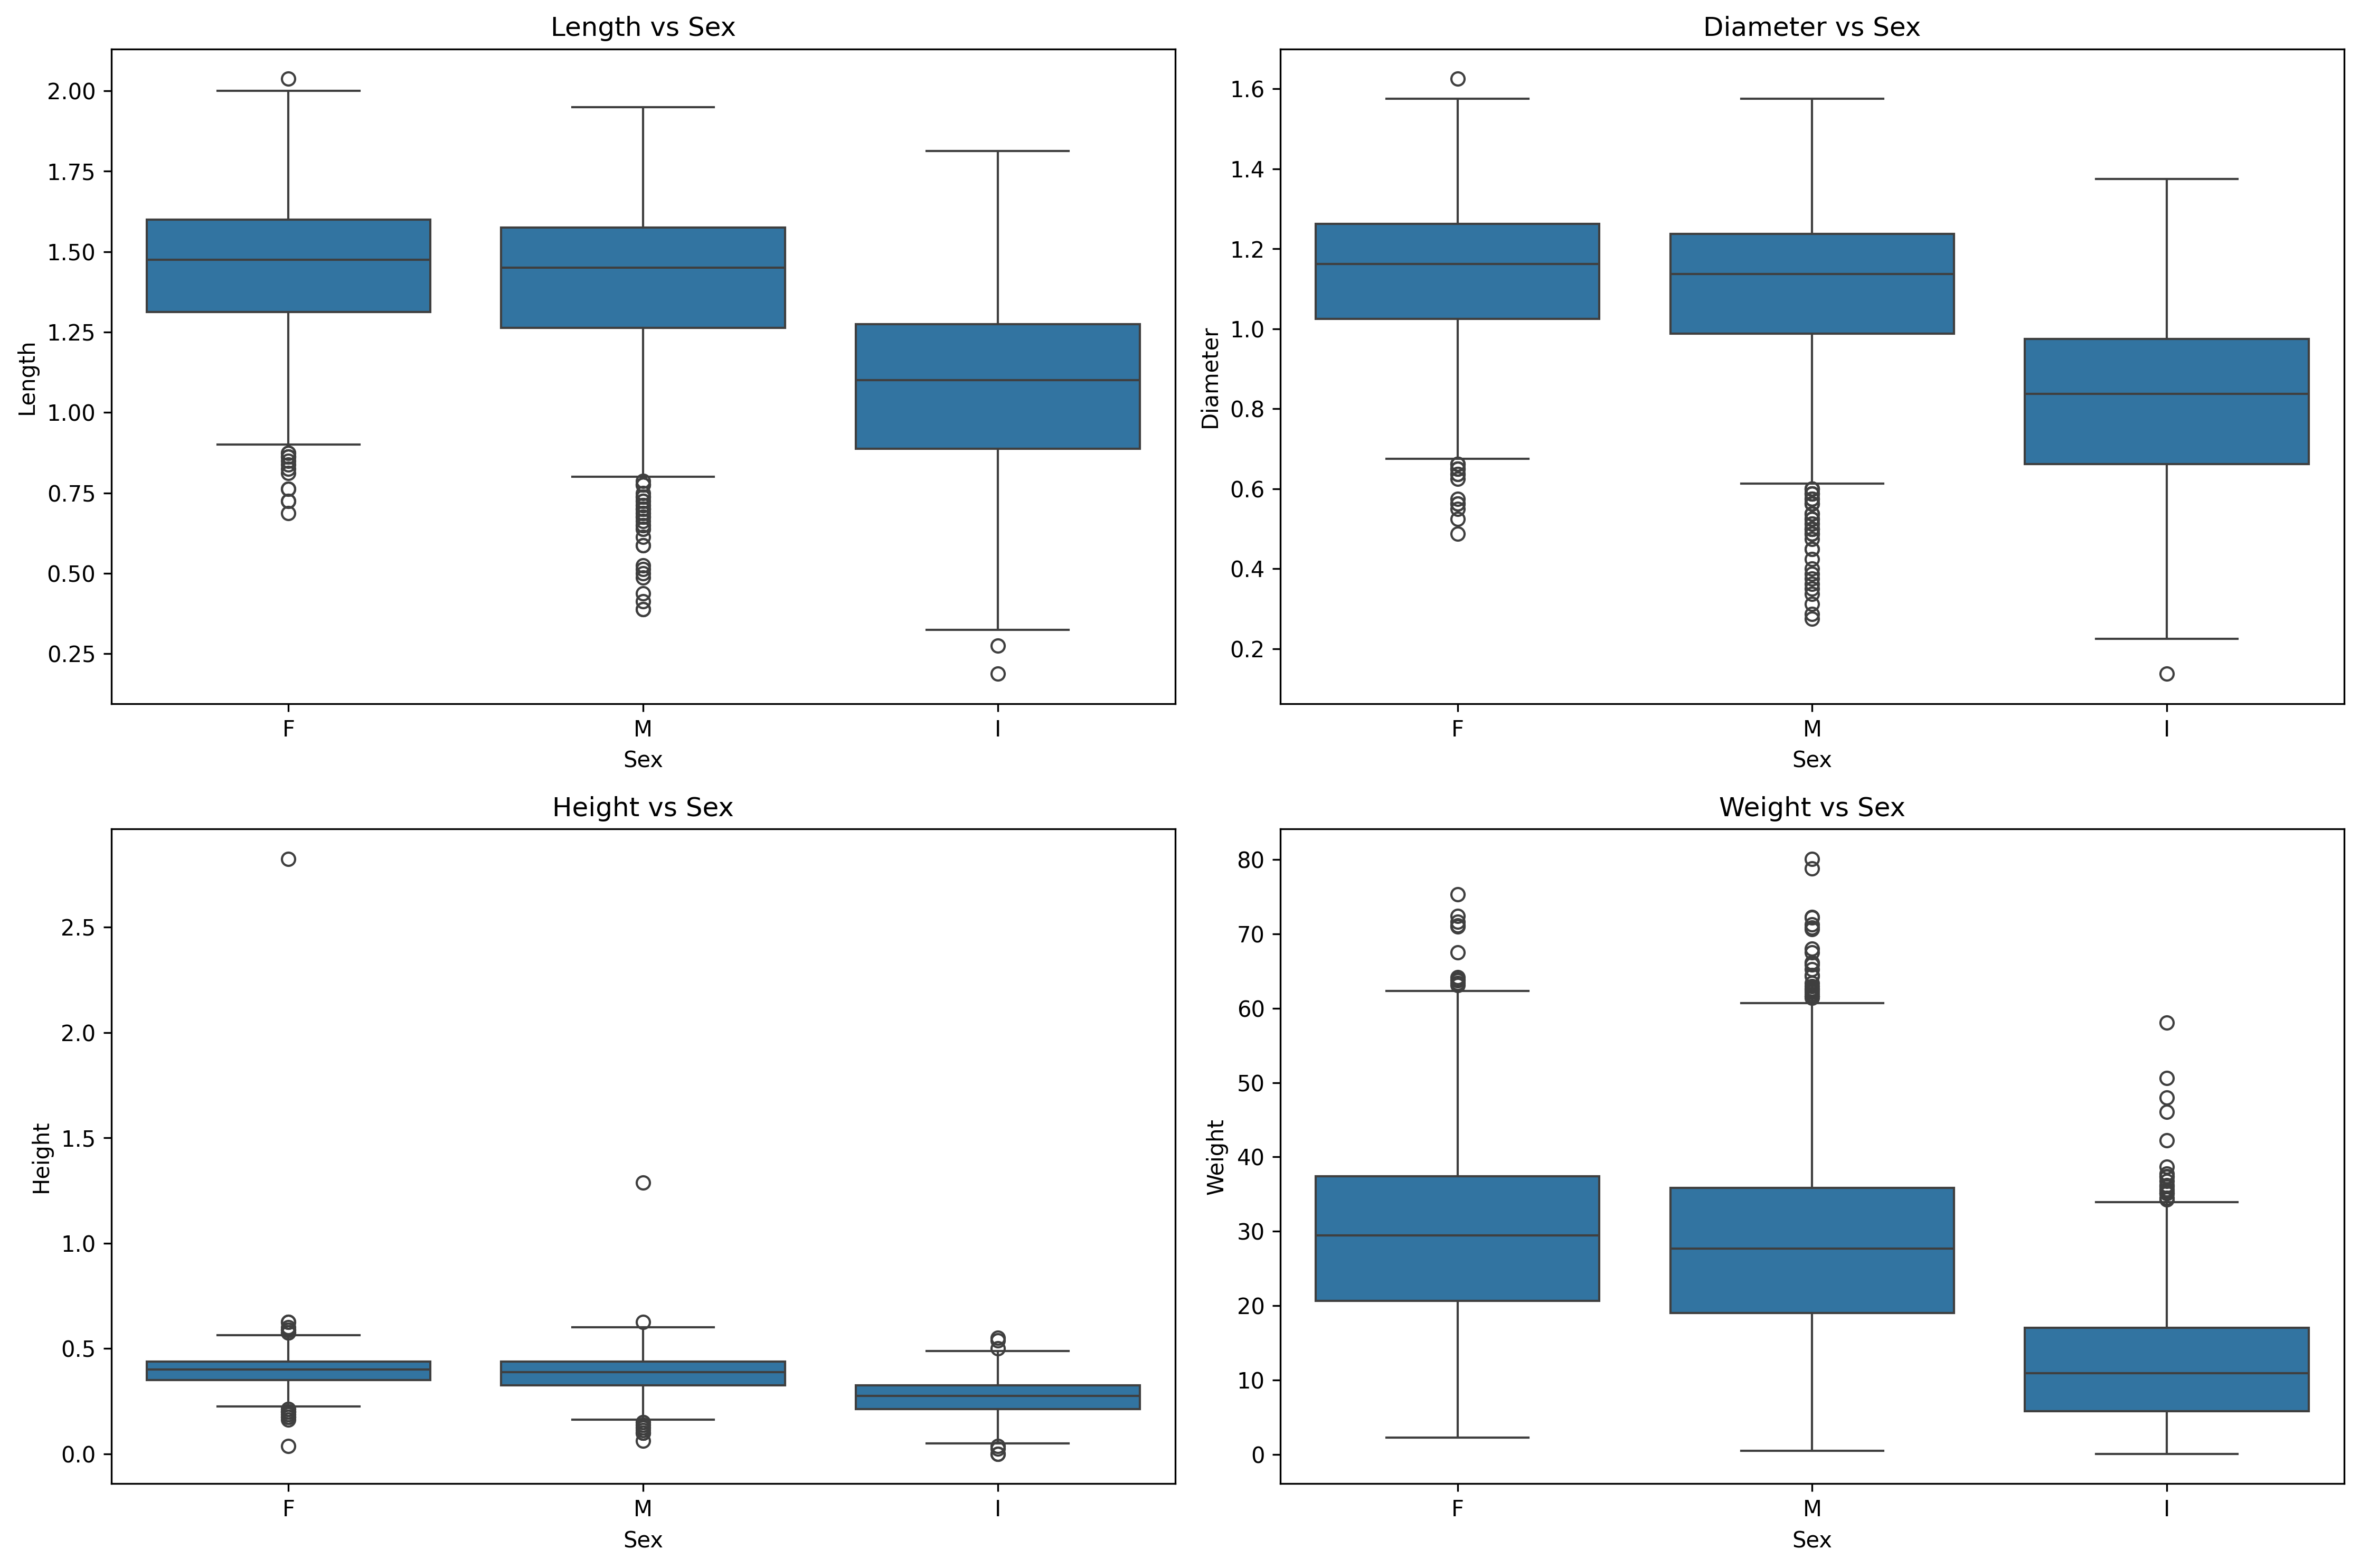

In [25]:

plt.figure(figsize=(15, 10),dpi=300)

plt.subplot(2, 2, 1)
sns.boxplot(x='Sex', y='Length', data=crab_data)
plt.title('Length vs Sex')

plt.subplot(2, 2, 2)
sns.boxplot(x='Sex', y='Diameter', data=crab_data)
plt.title('Diameter vs Sex')

plt.subplot(2, 2, 3)
sns.boxplot(x='Sex', y='Height', data=crab_data)
plt.title('Height vs Sex')

plt.subplot(2, 2, 4)
sns.boxplot(x='Sex', y='Weight', data=crab_data)
plt.title('Weight vs Sex')

plt.tight_layout()
plt.show()


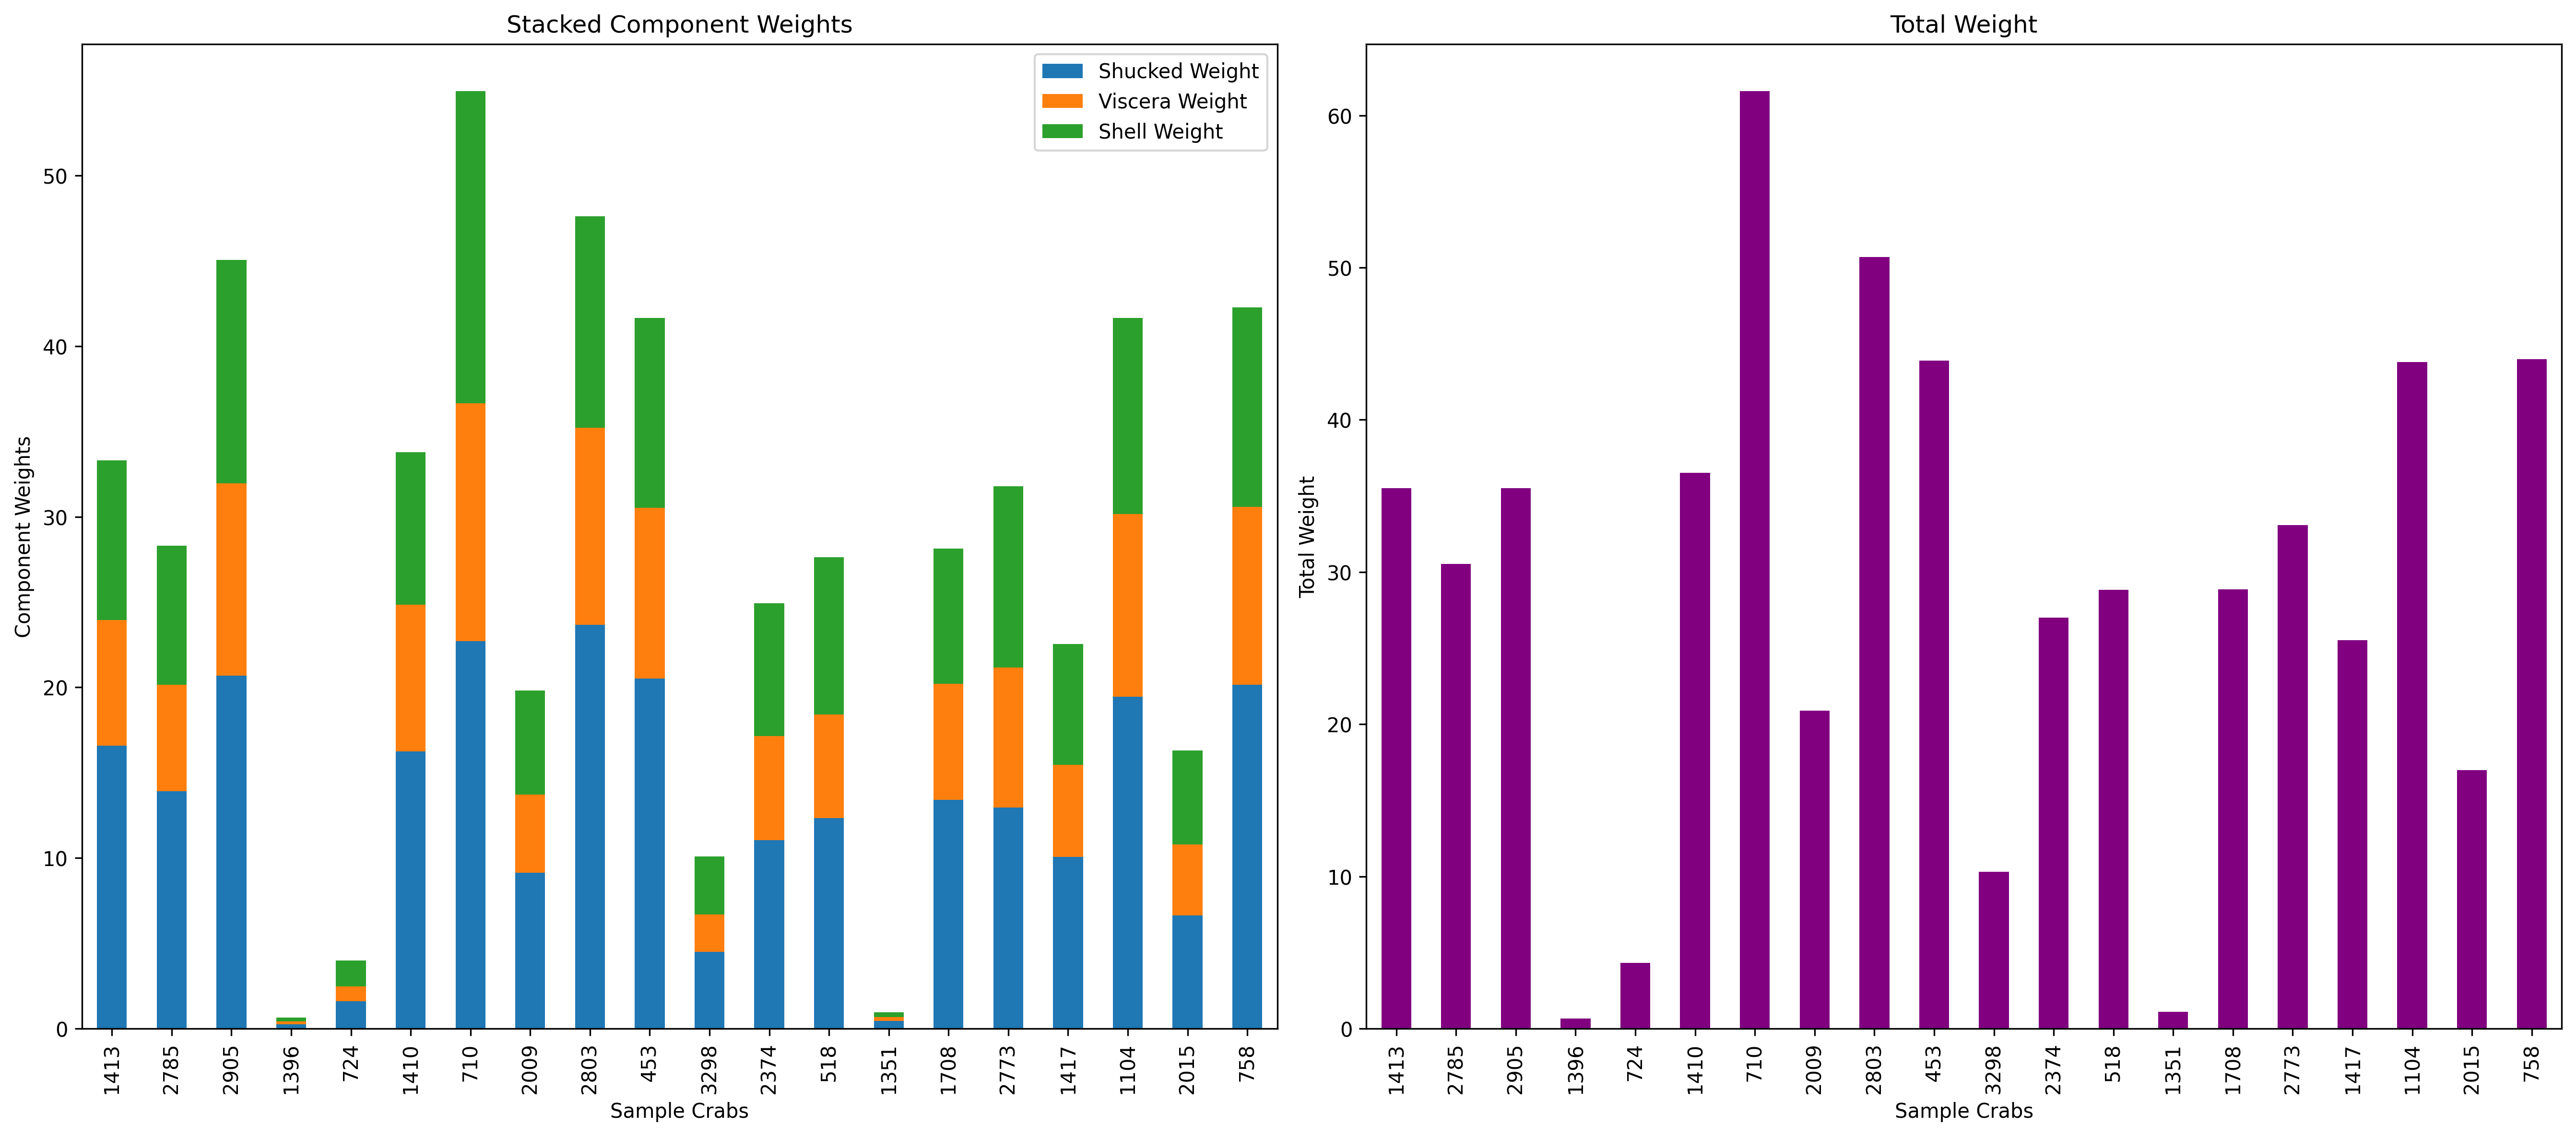

In [26]:
sample_data_stacked = crab_data.sample(20, random_state=1)[['Shucked Weight', 'Viscera Weight', 'Shell Weight']]
sample_data_stacked['Total Weight'] = crab_data.loc[sample_data_stacked.index, 'Weight']

fig, axes = plt.subplots(1, 2, figsize=(18, 8),dpi=300)

sample_data_stacked[['Shucked Weight', 'Viscera Weight', 'Shell Weight']].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Stacked Component Weights')
axes[0].set_ylabel('Component Weights')
axes[0].set_xlabel('Sample Crabs')
axes[0].legend(["Shucked Weight", "Viscera Weight", "Shell Weight"])

sample_data_stacked['Total Weight'].plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title('Total Weight')
axes[1].set_ylabel('Total Weight')
axes[1].set_xlabel('Sample Crabs')

plt.tight_layout()
plt.show()


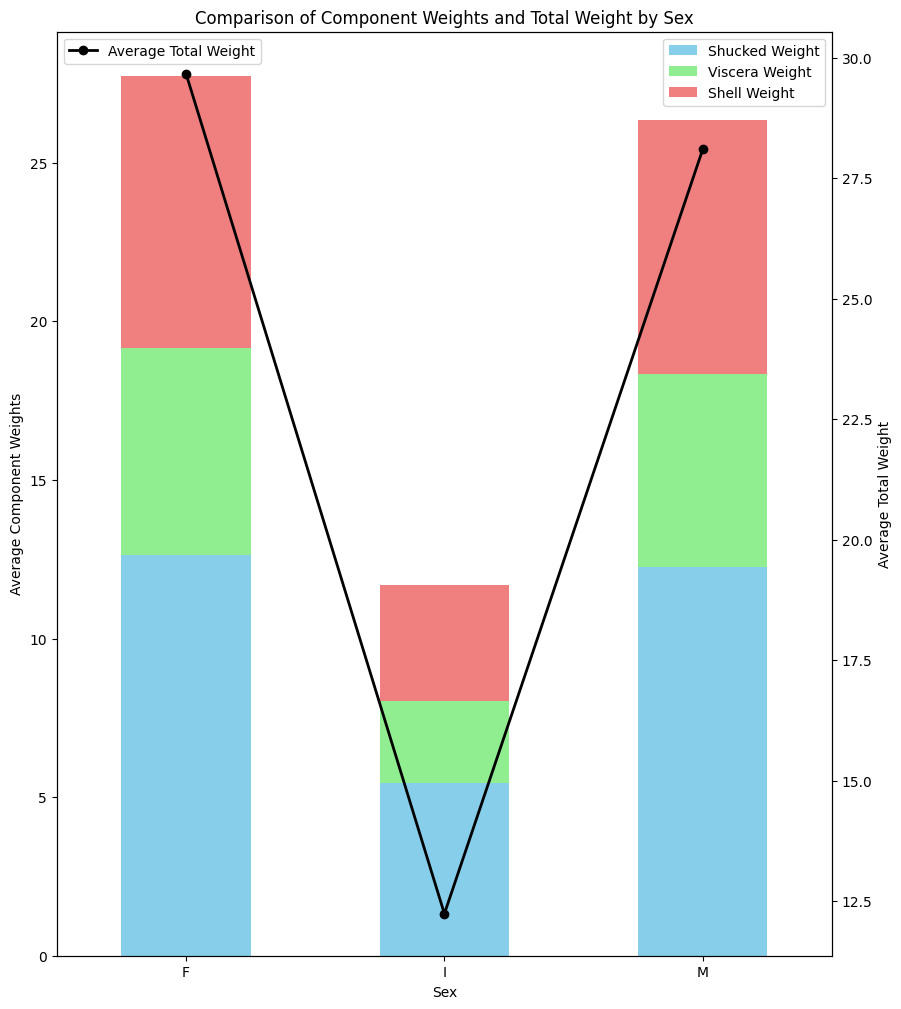

In [27]:
grouped_data = crab_data.groupby('Sex').mean()[['Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Weight']]

fig, ax = plt.subplots(figsize=(10, 12))

grouped_data[['Shucked Weight', 'Viscera Weight', 'Shell Weight']].plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'lightgreen', 'lightcoral'])

grouped_data['Weight'].plot(kind='line', color='black', marker='o', ax=ax, linewidth=2, secondary_y=True)

ax.set_ylabel('Average Component Weights')
ax.right_ax.set_ylabel('Average Total Weight')
ax.set_title('Comparison of Component Weights and Total Weight by Sex')
ax.set_xlabel('Sex')
plt.legend(['Average Total Weight'], loc='upper left')
ax.legend(loc='upper right')

plt.show()


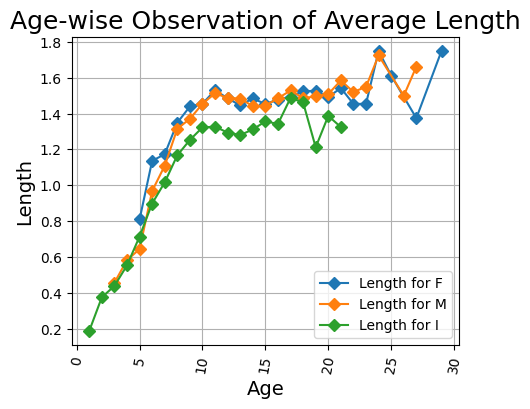

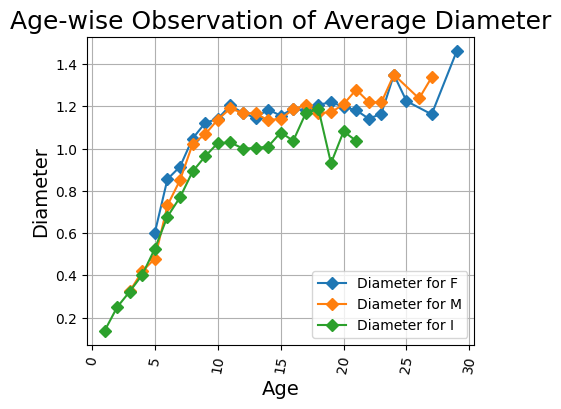

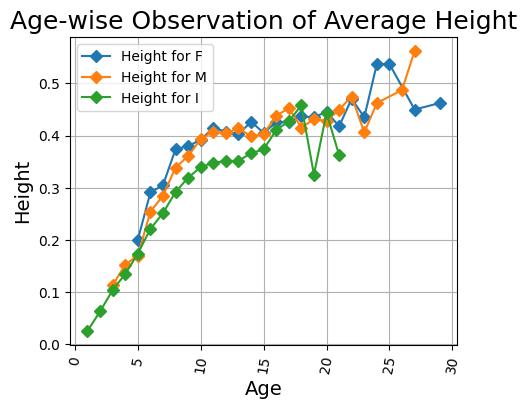

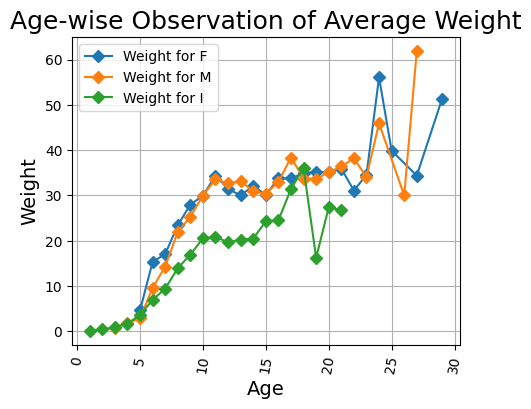

In [28]:
def plot_attribute_by_sex(data, attribute):
    plt.figure(figsize=(5, 4))

    sexes = data['Sex'].unique()

    for sex in sexes:
        subset = data[data['Sex'] == sex]

        mean_values = subset.groupby('Age')[attribute].mean()

        plt.plot(mean_values, marker='D', label=f'{attribute} for {sex}')

    plt.xlabel('Age', fontsize=14)
    plt.ylabel(attribute, fontsize=14)
    plt.title(f'Age-wise Observation of Average {attribute}', fontsize=18)
    plt.legend(fontsize=10, loc='best')
    plt.xticks(rotation=80)
    plt.grid(True)
    plt.show()

attributes = ['Length', 'Diameter', 'Height', 'Weight']

for attribute in attributes:
    plot_attribute_by_sex(crab_data, attribute)


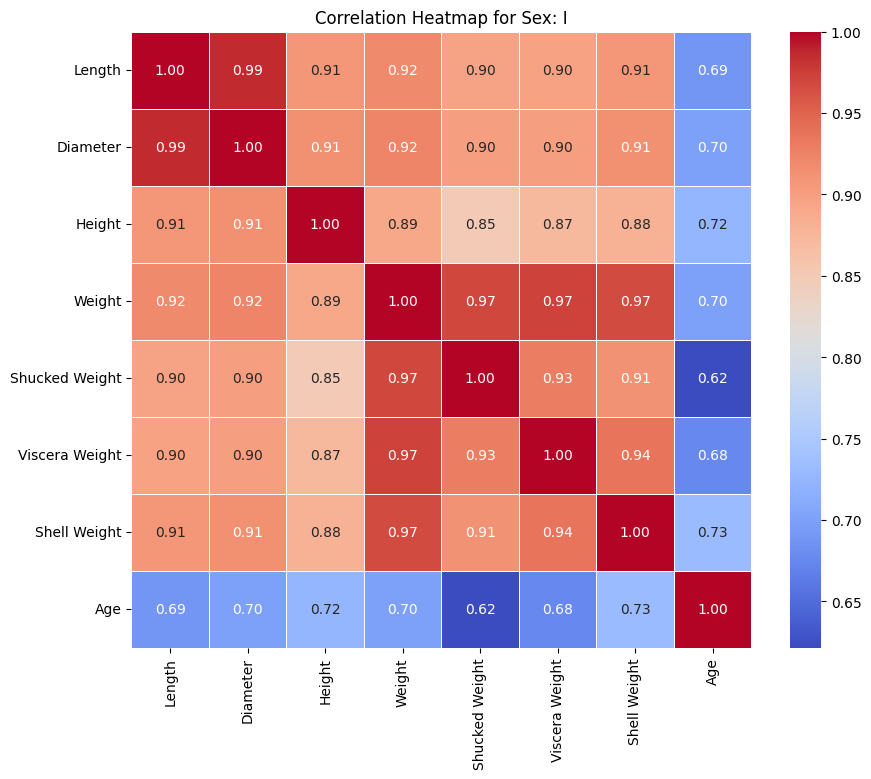

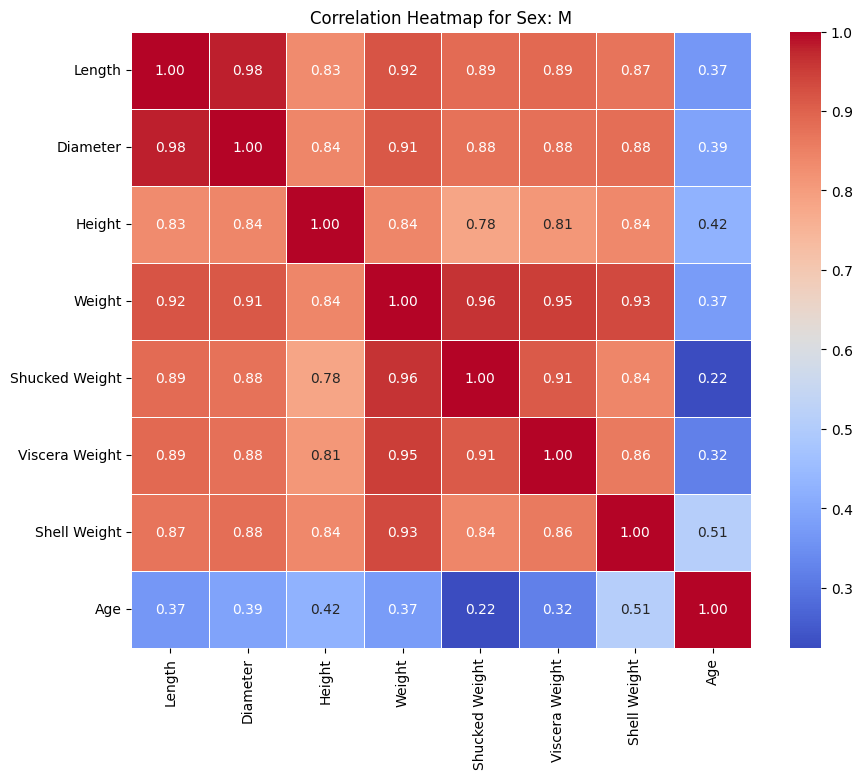

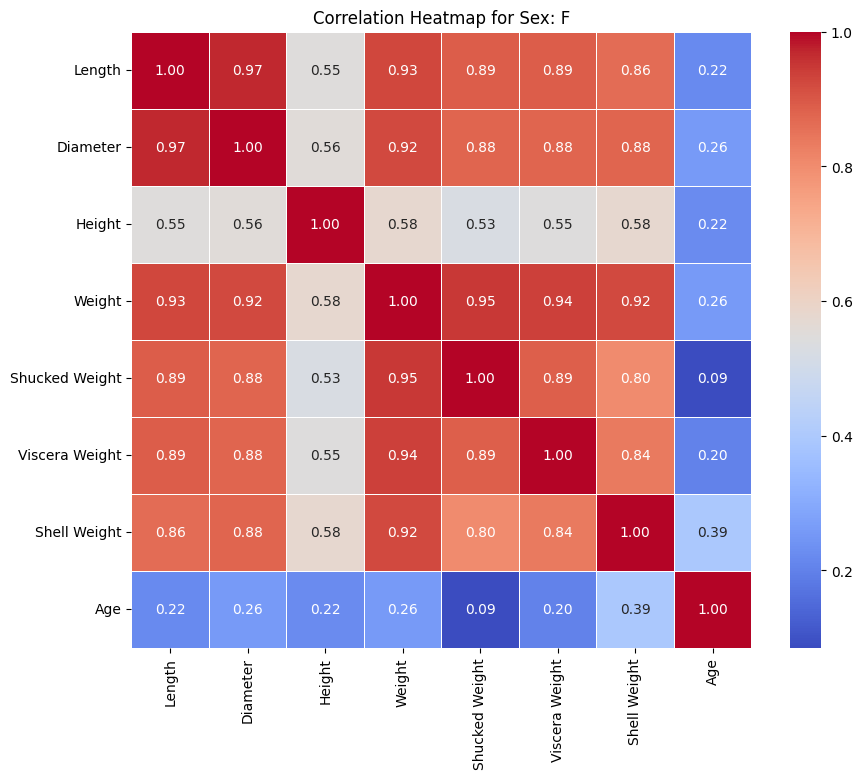

In [29]:
def create_sex_specific_heatmap(data, sex):
    filtered_data = data[data['Sex'] == sex]

    numerical_data = filtered_data.select_dtypes(include=[float, int])

    correlation_matrix = numerical_data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f"Correlation Heatmap for Sex: {sex}")
    plt.show()

sexes = ['I', 'M', 'F']
for sex in sexes:
    create_sex_specific_heatmap(crab_data, sex)


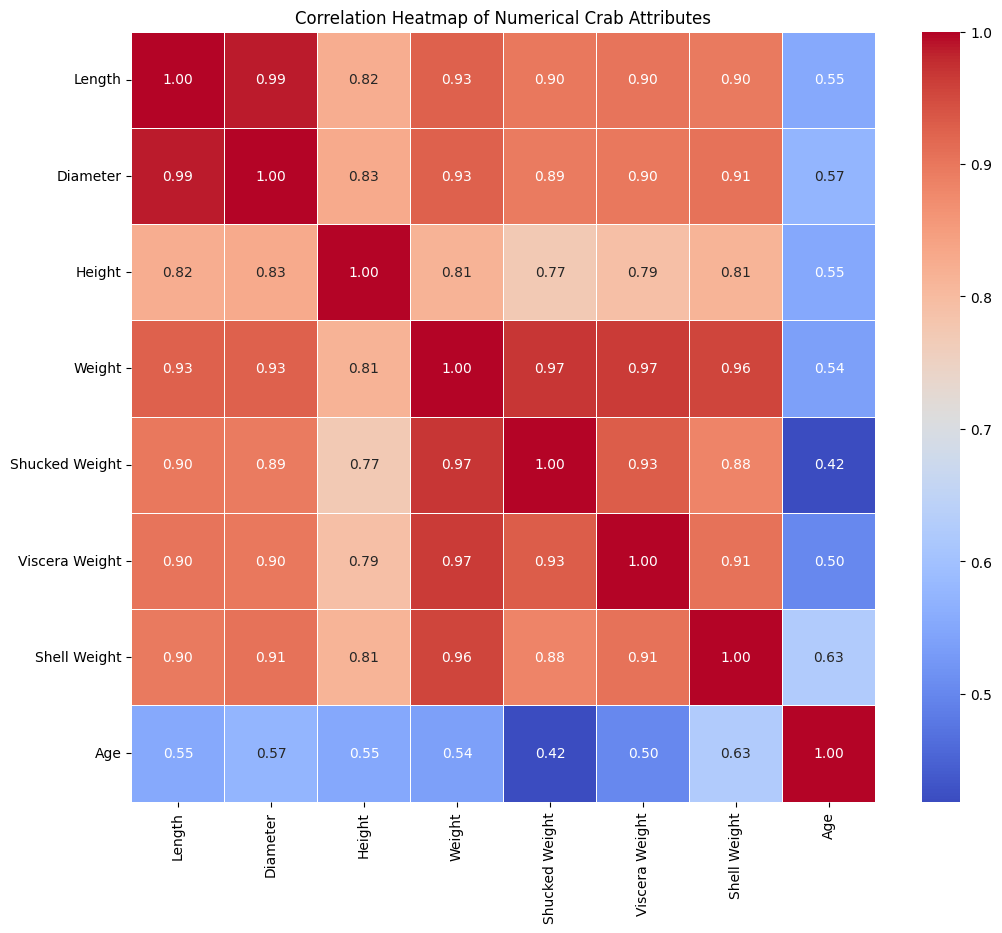

In [30]:
numerical_crab_data = crab_data.select_dtypes(include=[float, int])
correlation_matrix_numerical = numerical_crab_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Crab Attributes")
plt.show()


### Data Preprocessing

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

missing_values = crab_data.isnull().sum()

categorical_features = ['Sex']
numerical_features = crab_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('Age')  # Excluding the target variable

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = crab_data.drop('Age', axis=1)
y = crab_data['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

missing_values, X_train.head()


(Sex               0
 Length            0
 Diameter          0
 Height            0
 Weight            0
 Shucked Weight    0
 Viscera Weight    0
 Shell Weight      0
 Age               0
 dtype: int64,
      Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
 3732   M  1.6250    1.3000  0.4750  38.115903       14.713390        8.674947   
 3162   M  1.5875    1.2250  0.4375  38.980562       17.661738        7.668540   
 175    F  1.6750    1.3000  0.4875  51.213372       21.488921       10.588538   
 278    M  1.7375    1.4500  0.5000  53.849875       19.135912       13.551061   
 1074   I  1.0000    0.7875  0.2250   9.355335        4.280774        1.927766   
 
       Shell Weight  
 3732     12.658052  
 3162     11.198052  
 175      14.330672  
 278      15.011060  
 1074      2.267960  )

### Machine Learning (Ensemble method)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVM': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

model_performance = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_performance[model_name] = {'MSE': mse, 'R2': r2}

model_performance


{'Linear Regression': {'MSE': 4.640688228094452, 'R2': 0.5170708365029365},
 'Decision Tree': {'MSE': 8.195121951219512, 'R2': 0.1471817984454542},
 'Random Forest': {'MSE': 4.407186392811297, 'R2': 0.5413700008608546},
 'SVM': {'MSE': 4.867133590954766, 'R2': 0.49350599777882664},
 'Gradient Boosting': {'MSE': 4.42776391127533, 'R2': 0.5392286193910718}}

In [33]:
from sklearn.ensemble import VotingRegressor

ensemble_models = [
    ('Random Forest', models['Random Forest']),
    ('Gradient Boosting', models['Gradient Boosting'])
]

voting_regressor = VotingRegressor(estimators=ensemble_models)

ensemble_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('voting_regressor', voting_regressor)])

ensemble_pipeline.fit(X_train, y_train)

y_pred_ensemble = ensemble_pipeline.predict(X_test)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

ensemble_performance = {'MSE': mse_ensemble, 'R2': r2_ensemble}
ensemble_performance


{'MSE': 4.295793402941946, 'R2': 0.5529620149701782}

### Cross Validation


In [35]:
from sklearn.model_selection import cross_val_score

k_folds_reduced = 3

cv_results_reduced = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    mse_scores = -cross_val_score(pipeline, X, y, cv=k_folds_reduced, scoring='neg_mean_squared_error')
    mse_avg = mse_scores.mean()

    r2_scores = cross_val_score(pipeline, X, y, cv=k_folds_reduced, scoring='r2')
    r2_avg = r2_scores.mean()

    cv_results_reduced[model_name] = {'CV MSE': mse_avg, 'CV R2': r2_avg}

mse_scores_ensemble = -cross_val_score(ensemble_pipeline, X, y, cv=k_folds_reduced, scoring='neg_mean_squared_error')
mse_avg_ensemble = mse_scores_ensemble.mean()

r2_scores_ensemble = cross_val_score(ensemble_pipeline, X, y, cv=k_folds_reduced, scoring='r2')
r2_avg_ensemble = r2_scores_ensemble.mean()

cv_results_reduced['Ensemble'] = {'CV MSE': mse_avg_ensemble, 'CV R2': r2_avg_ensemble}

cv_results_reduced



{'Linear Regression': {'CV MSE': 4.896764177749361,
  'CV R2': 0.5273179169537116},
 'Decision Tree': {'CV MSE': 9.036247569061233, 'CV R2': 0.1280124502608445},
 'Random Forest': {'CV MSE': 4.785812865828812, 'CV R2': 0.5380920846597945},
 'SVM': {'CV MSE': 5.061543814011283, 'CV R2': 0.5114139173883255},
 'Gradient Boosting': {'CV MSE': 4.770850186243673,
  'CV R2': 0.5395206475607154},
 'Ensemble': {'CV MSE': 4.664216140496602, 'CV R2': 0.549816036439139}}

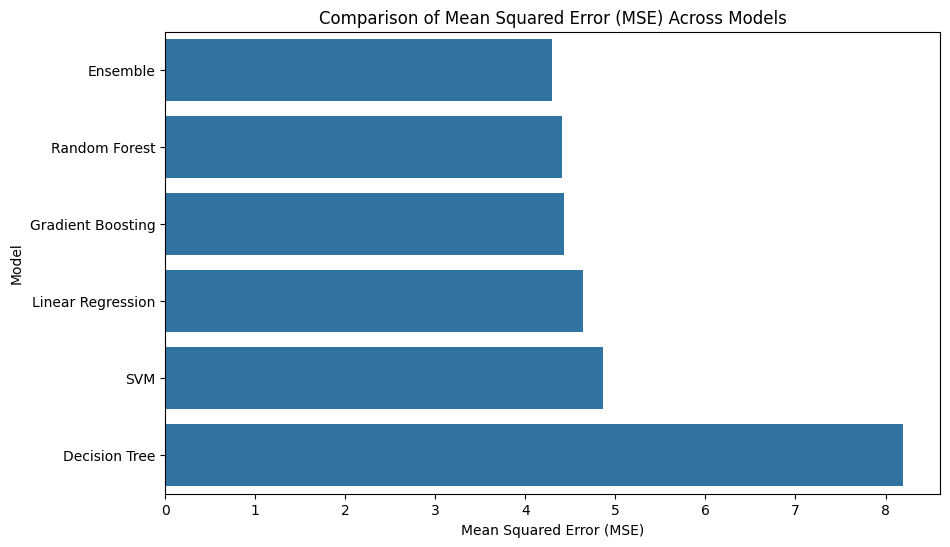

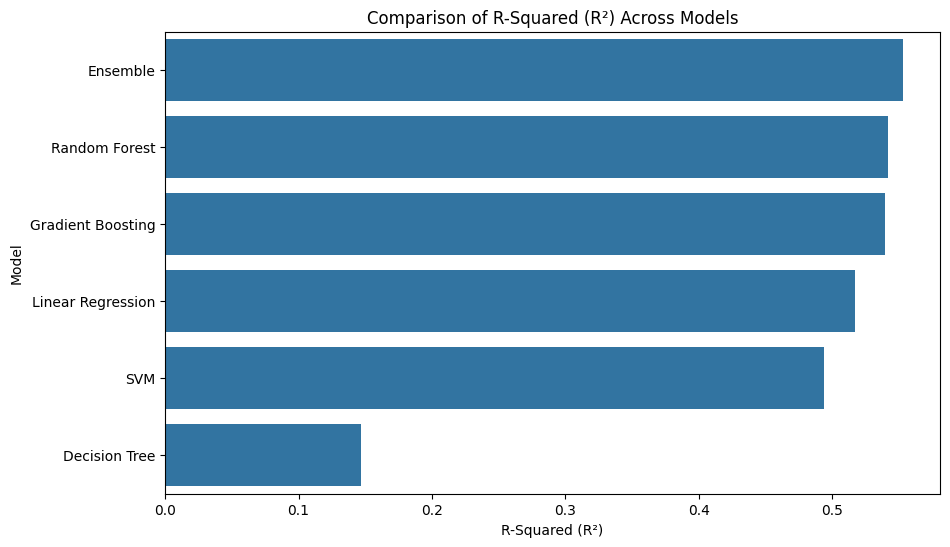

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

model_performance['Ensemble'] = ensemble_performance

models = list(model_performance.keys())
mse_values = [model_performance[model]['MSE'] for model in models]
r2_values = [model_performance[model]['R2'] for model in models]

performance_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R2': r2_values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Model', data=performance_df.sort_values('MSE'))
plt.title('Comparison of Mean Squared Error (MSE) Across Models')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Model')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Model', data=performance_df.sort_values('R2', ascending=False))
plt.title('Comparison of R-Squared (R²) Across Models')
plt.xlabel('R-Squared (R²)')
plt.ylabel('Model')
plt.show()


In [ ]:
import numpy as np

np.random.seed(42)  # For reproducibility

random_input = {
    'Sex': np.random.choice(['F', 'M', 'I']),
    'Length': np.random.uniform(0.5, 2.0),         # Assuming Length ranges from 0.5 to 2.0
    'Diameter': np.random.uniform(0.4, 1.5),       # Assuming Diameter ranges from 0.4 to 1.5
    'Height': np.random.uniform(0.1, 0.6),         # Assuming Height ranges from 0.1 to 0.6
    'Weight': np.random.uniform(5, 60),            # Assuming Weight ranges from 5 to 60
    'Shucked Weight': np.random.uniform(2, 30),    # Assuming Shucked Weight ranges from 2 to 30
    'Viscera Weight': np.random.uniform(1, 15),    # Assuming Viscera Weight ranges from 1 to 15
    'Shell Weight': np.random.uniform(1, 20)       # Assuming Shell Weight ranges from 1 to 20
}

input_df = pd.DataFrame([random_input])

input_df



,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.694814,0.601778,0.489846,37.826759,14.483317,2.399649,9.725729


### Age Prediction

In [ ]:
age_prediction = ensemble_pipeline.predict(input_df)

predicted_age = age_prediction[0]
predicted_age


11.694561440943502